# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
for opt in ['SGD', 'RMSprop', 'AdaGrad', 'Adam']:
    keras.backend.clear_session() # 清除舊的Graph
    print('Expertiment with： ' + opt + ' Optimizer')
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics = ['accuracy'])
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = opt
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid_loss':valid_loss,
                             'train_acc':train_acc,
                             'valid_acc':valid_acc}

Expertiment with： SGD Optimizer
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

50000/50000 [==============================] - 7s 139us/step - loss: 1.2269 - accuracy: 0.5664 - val_loss: 1.3967 - val_accuracy: 0.4996
Epoch 49/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.2264 - accuracy: 0.5695 - val_loss: 1.4104 - val_accuracy: 0.4890
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.2215 - accuracy: 0.5716 - val_loss: 1.4488 - val_accuracy: 0.4949
Expertiment with： RMSprop Optimizer
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________________________________

Epoch 46/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.8412 - accuracy: 0.6973 - val_loss: 2.0671 - val_accuracy: 0.4856
Epoch 47/50
50000/50000 [==============================] - 8s 163us/step - loss: 0.8267 - accuracy: 0.7017 - val_loss: 1.8222 - val_accuracy: 0.4826
Epoch 48/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.8188 - accuracy: 0.7055 - val_loss: 1.9052 - val_accuracy: 0.4900
Epoch 49/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.8055 - accuracy: 0.7103 - val_loss: 1.8406 - val_accuracy: 0.4965
Epoch 50/50
50000/50000 [==============================] - 8s 166us/step - loss: 0.7960 - accuracy: 0.7146 - val_loss: 1.8339 - val_accuracy: 0.4965
Expertiment with： AdaGrad Optimizer
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

50000/50000 [==============================] - 9s 176us/step - loss: 1.1393 - accuracy: 0.5997 - val_loss: 1.3871 - val_accuracy: 0.5188
Epoch 44/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.1319 - accuracy: 0.6014 - val_loss: 1.3899 - val_accuracy: 0.5144
Epoch 45/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.1236 - accuracy: 0.6071 - val_loss: 1.3781 - val_accuracy: 0.5172
Epoch 46/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.1176 - accuracy: 0.6081 - val_loss: 1.3638 - val_accuracy: 0.5263
Epoch 47/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.1093 - accuracy: 0.6092 - val_loss: 1.3878 - val_accuracy: 0.5144
Epoch 48/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.1045 - accuracy: 0.6121 - val_loss: 1.3761 - val_accuracy: 0.5222
Epoch 49/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.0980 - accuracy: 0.6138 - val_loss:

50000/50000 [==============================] - 10s 206us/step - loss: 0.7528 - accuracy: 0.7311 - val_loss: 1.5913 - val_accuracy: 0.5311
Epoch 41/50
50000/50000 [==============================] - 10s 209us/step - loss: 0.7497 - accuracy: 0.7315 - val_loss: 1.6172 - val_accuracy: 0.5281
Epoch 42/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.7269 - accuracy: 0.7409 - val_loss: 1.6623 - val_accuracy: 0.5171
Epoch 43/50
50000/50000 [==============================] - 10s 207us/step - loss: 0.7116 - accuracy: 0.7456 - val_loss: 1.6188 - val_accuracy: 0.5274
Epoch 44/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.6958 - accuracy: 0.7523 - val_loss: 1.7086 - val_accuracy: 0.5156
Epoch 45/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.6955 - accuracy: 0.7504 - val_loss: 1.7390 - val_accuracy: 0.5144
Epoch 46/50
50000/50000 [==============================] - 11s 216us/step - loss: 0.6688 - accuracy: 0.7612 - va

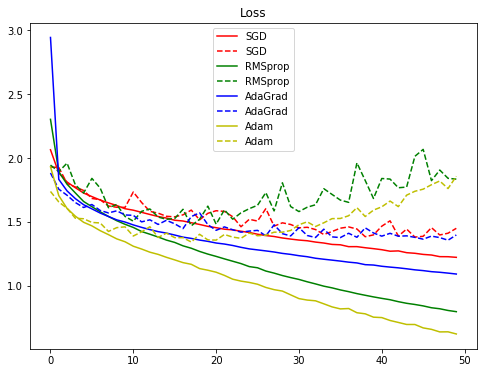

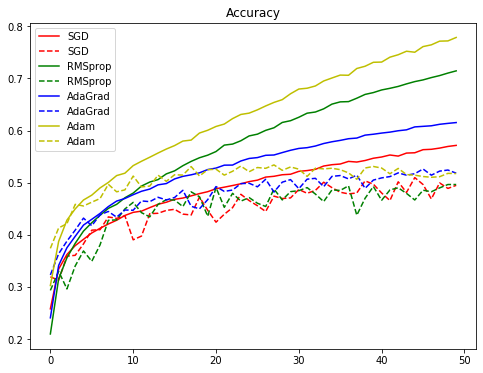

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()